<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>
Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline), Data Scientist at Mail.Ru Group <br>
Translated and edited by [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), <br>[Evgene Mashkin](https://www.linkedin.com/in/eugene-mashkin-88490883/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/).
    
This material is subject to the terms and conditions of the license [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Free use is permitted for any non-comercial purpose with an obligatory indication of the names of the authors and of the source.

# <center>Assignment #7. PCA and Clustering</center>

In this assignment, we are going to walk through the built-in implementations for dimensionality reduction and clustering methods in `scikit-learn`. Answers should be submitted through [this web-form](https://goo.gl/forms/oPqLDP8nn9gSelSN2).

## 1. Principal Component Analysis

First, import all required modules:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.model_selection import train_test_split

Use the given toy data set:

In [2]:
X = np.array([[2., 13.], [1., 3.], [6., 19.],
              [7., 18.], [5., 17.], [4., 9.],
              [5., 22.], [6., 11.], [8., 25.]])

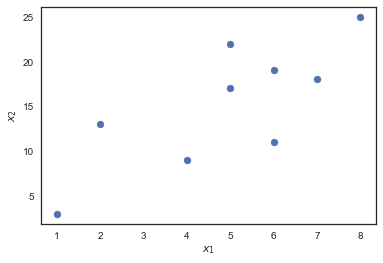

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

#### Question 1. What is the angle between the $x_1$ axis and the vector corresponding to the first principal component for this data (don't forget to rescale the data using StandardScaler)? 
- 30 degrees
- 45 degrees
- 60 degrees
- 75 degrees

In [4]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)
vec1 = pca.components_[0]
print(vec1)
angle = np.arctan(vec1[1]/vec1[0])/np.pi*180
print(angle)

[-0.70710678 -0.70710678]
45.0


#### Question 2. </font> What are the eigenvalues of the $X^TX$ matrix, given $X$ is a rescaled matrix of the toy dataset?

 - 4 and 1.42
 - 16.2 and 2702.8
 - 4.02 and 51.99
 - 15.97 and 2.03

In [5]:
# Your code here
np.round(pca.singular_values_, 2)

array([ 4.  ,  1.42])

#### Question 3. </font> What is the meaning of the two numbers from the previous question?


- ##### their squares tell what part of the initial data's variance is explained by principal components
- they define a rotation angle between the first principal component and the initial axis
- those numbers tell what part of the initial data's variance is explained by principal components
- the square roots of those numbers define a rotation angle between the first principal component and the initial axis

Let's load a dataset of peoples' faces and output their names. (This step requires stable, fast internet connection.)

In [6]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

RuntimeError: Failed to read the image file ../../data/faces\lfw_home\lfw_funneled\Ariel_Sharon\Ariel_Sharon_0001.jpg, Please make sure that libjpeg is installed

Let's look at some faces. All images are stored in a handy `lfw_people.images` array.

In [ ]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

#### Question 4. </font>What  **minimal** principal component number is needed to explain 90% of data variance (scaled using  StandardScaler)?

- 75
- 76
- ##### 77
- 78

For this task, you should be using the [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) parameter, which is a PCA approximation, but it significantly increases performance on large data sets. Use fixed `random_state=1` for comparable results.

In [ ]:
# Your code here
scaler = StandardScaler().fit(lfw_people.data)
scaled_data = scaler.transform(lfw_people.data)
pca = PCA(n_components=80, svd_solver='randomized', random_state=1).fit(scaled_data)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(74, 80)
plt.ylim(0.85, 0.95)
plt.yticks(np.arange(0.85, 0.95, 0.01))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[76]

Print a picture showing the first 30 principal components (don't be scared when you see the results). In order to create it, use 30 vectors from `pca.components_`, reshape them to their initial size (50 x 37), and display.

In [ ]:
# Your code here
#data = [pca.components_[i].reshape((50,37)) for i in range(0, 31)]
fig = plt.figure(figsize=(10, 7))

for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50,37)), cmap='gray')

#### Question 5. </font> Within the first 30 principal components, which one brightens the left side of the face? More specifically, which principal component corresponds to a linear combination of the initial features (pixels' intensity), which, when shown as an image, looks like a photo highlighted from the left side?

- 1
- ##### 2
- 4
- 5

Now let's create a projection of faces onto the space of the first two principal components. 

#### Question 6. </font> Who looks the least similar to the other people in the dataset if we only consider the two first principal components? 

To answer this question, take the first two principal components from the rescaled data, evaluate two mean principal components' values for each person over all their images in the dataset (again, use both svd_solver='randomized' and random_state=1). Then, with 12 two-dimensional points, find the one which has the largest distance from the others (by Euclidean distance). You can do this either precsisely or approximately using `sklearn.metrics.euclidean_distances` and `seaborn.heatmap`.

- Colin Powell
- George W Bush
- Jacques Chirac
- ##### Serena Williams

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from seaborn import heatmap
print(lfw_people.target_names)

pca = PCA(n_components=2, svd_solver='randomized', random_state=1).fit(scaled_data)

vectors = []
for target, person in enumerate(lfw_people.target_names):
    person_images = scaled_data[pd.Series(lfw_people.target) == target]
    vectors.append(pca.transform(person_images).mean(axis=0))

heatmap(euclidean_distances(vectors[:]))

In [ ]:
print(lfw_people.target_names[10])

## 2. Clustering

For the next question, load the housing prices dataset:

In [ ]:
boston = datasets.load_boston()
X = boston.data

Using the elbow-method (reference [article 7](https://habrahabr.ru/company/ods/blog/325654/) of the course), find the optimal number of clusters to set as a hyperparameter for the k-means algorithm.

#### Question 7. </font> What is the optimal number of clusters to use on housing prices data set according to the elbow-method? Use `random_state=1` in the k-means method, and don't rescale the data.

- 2
- 3
- ##### 4
- 5

In this case, we are looking for the most significant curve fracture on the `Cluster number vs Centroid distances` graph. Consider the number of clusters from 2 to 10. Use `random_state=1` for the k-means algorithm initialization.

In [ ]:
# Your code here
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Go back to the faces dataset. Imagine that we did not know the names for who was each photo but that we knew that there were 12 different people. Let's compare clustering results from 4 algorithms - k-means, Agglomerative clustering, Affinity Propagation, and Spectral clustering. Use the same respective parameters as in the end of lesson article, only change the number of clusters to 12.

In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

X, y = scaled_data, lfw_people.target

algorithms = []
algorithms.append(KMeans(n_clusters=12, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=12, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=12))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

In [ ]:
y2 = (lfw_people.target == 10).astype(int)
algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y2, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y2, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y2, algo.labels_),
        'Completeness': metrics.completeness_score(y2, algo.labels_),
        'V-measure': metrics.v_measure_score(y2, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

#### Question 8. </font> Select all of the correct statements:

- Agglomerative clustering worked better than others by all metrics
- ##### Clustering results are disappointing - there isn't a metric that exceeds 35%
- ##### Affinity Propagation worked better than Spectral clustering by all metrics
- Considering only 2 clusters (whether it is Serena Williams or not) and comparing clustering results with a binary vector, we can see that clustering algorithms work better, with some metrics exceeding 66%

Use the coordinates of the 12 "average" people's images you got before. Draw a dendrogram for them. Use `scipy.cluster.hierarchy` and `scipy.spatial.distance.pdist`, take parameters values from the appropriate example in the [article](https://habrahabr.ru/company/ods/blog/325654/).

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist


distance_mat = pdist(vectors) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [ ]:
lfw_people.target_names[7]

#### Question 9. What person corresponds to the point that, according to the dendrogram, is connected with all but the last one?

- Gerhard Schroeder
- ##### Jean Chretien
- John Ashcroft
- Junichiro Koizumi